In [1626]:
import numpy as np
import pygad.gann
import pygad.nn
import pygad
import matplotlib.pyplot as plt

 **Vstupni a vystupni data**

In [1627]:
vstupni_data = np.array([[0,1], [1,0], [1,1], [0,0]])
vystupni_data = np.array([1,1,0,0])  

In [1628]:
vstupni_data.shape

(4, 2)

**Objekt tridy, kde kazdy jedinec je instance tridy a ma stejnou architecturu**

In [1629]:
pocet_vstupnich_neuronu = vstupni_data.shape[1]
pocet_vystup_neuronu = 2

pocet_reseni = 50
GANN_instance = pygad.gann.GANN(num_solutions = pocet_reseni,
                                num_neurons_input = pocet_vstupnich_neuronu,
                                num_neurons_hidden_layers = [2],
                                num_neurons_output = pocet_vystup_neuronu,
                                hidden_activations = ["relu"],
                                output_activation = "softmax")

In [1630]:
global GANN_instance, vstupni_data, vystupni_data

**Rucne definovana fitness funkce**

In [1631]:
def fitness_func(ga_instance, solution, solution_idx):
    predikce = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                                   data_inputs=vstupni_data)
    pocet_spravne_predikovanych = np.where(predikce == vystupni_data)[0].size
    E_trm = 0.5 * (pocet_spravne_predikovanych - vystupni_data.size)**2
    reseni_fitness = 1/(E_trm+1)

    return reseni_fitness

**nastavovani parametru genetickeho algorithmu**

In [1632]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

initial_population = population_vectors.copy()

pocet_generace = 100
pocet_rodicu_na_krizeni = 6
sance_mutace = 0.5

typ_selekce = "rws" #  rws tournament
typ_kruzeni = "single_point"
typ_mutace = "swap" 
nechat_rodice = 2

nejmensi_hod_wah = -5
nejvetsi_hod_wah = 5

In [1633]:
print(len(initial_population[0]))

8


pygad.gann.population_as_matrices - prevadi populace prezentovanou jako vektory zpet na matice vah

population_networks - seznam neuronovych siti kde kazda sit odpovida jednomu reseni populaci

population_vectors - seznam vektoru vah kde kazdy vektor predstavuje vahy jedne z neuronovych siti v population_networks

In [1634]:
nejlep_fitness_vysledky = []

def callback_generation(ga_instance):

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, population_vectors=ga_instance.population)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    
    global nejlep_fitness_vysledky
    aktualni_fitness = ga_instance.last_generation_fitness
    nejlep_fitness_vysledky.append(np.max(aktualni_fitness))

In [1635]:
ga_instance = pygad.GA(num_generations = pocet_generace, 
                       num_parents_mating = pocet_rodicu_na_krizeni, 
                       initial_population=initial_population,
                       fitness_func = fitness_func,
                       mutation_percent_genes = sance_mutace,
                       init_range_low = nejmensi_hod_wah,
                       init_range_high = nejvetsi_hod_wah,
                       parent_selection_type = typ_selekce,
                       crossover_type = typ_kruzeni,
                       mutation_type = typ_mutace,
                       keep_parents = nechat_rodice,
                       on_generation = callback_generation)

In [1636]:
ga_instance.run()

In [1637]:
reseni, fitness, reseni_idx = ga_instance.best_solution()
vysledek = {
    'fitness': fitness,
    'reseni': reseni,
    'fitness_history': nejlep_fitness_vysledky
}

In [1638]:
print(vysledek['fitness'])
print(vysledek['reseni'])

1.0
[-0.07923636  0.00174031  0.07023771 -0.07308148  0.05565327  0.00174031
  0.07023771 -0.00084192]


In [1639]:
vysledek['fitness_history']

[0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

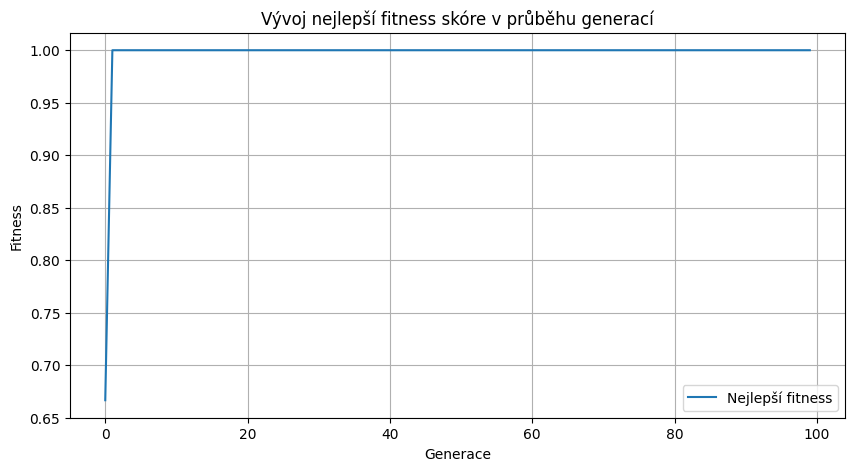

In [1640]:
plt.figure(figsize=(10, 5))
plt.plot(vysledek['fitness_history'], label='Nejlepší fitness')
plt.title('Vývoj nejlepší fitness skóre v průběhu generací')
plt.xlabel('Generace')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()